In [2]:
#問題30の処理を関数化した
def prepare():
    with open("neko.txt.mecab", "r", encoding="utf-8") as f:
        data = f.readlines()    #各行の読み込み
        data = [line.strip("\n") for line in data]  #全ての行から"\n"を排除

    ans = []    #回答保存用配列

    #各行をループ
    for text in data:
        if text == "EOS":
            break
        dict = {}

        #空白の場合の処理
        if text[0] == " ":
            dict["surface"] = " "
            dict["base"] = " "
            temp = text.split("\t")
            print(temp)
            dict["pos"] =temp[0]
            dict["pos1"] = temp[1]
        #それ以外
        else:
            temp = text.split("\t")
            dict["surface"] = temp[0]
            dict["base"] = temp[1]
            dict["pos"] = temp[2]
            dict["pos1"] = temp[3]
        ans.append(dict)
    return ans

In [4]:
datas = prepare()

# 一文ごとに配列を分ける
data_SplitBy_sentence = []
sentence = []
for data in datas:
    # 空白は飛ばす
    if data["pos1"] == "空白":
        continue
    # 句点で区切る
    if data["pos1"] == "句点":
        data_SplitBy_sentence.append(sentence)
        sentence = []
    else:
        sentence.append(data["base"])

count_dict = {}
for sentence in data_SplitBy_sentence:
    neko_num =sentence.count("猫")
    for word in sentence:
        if word in count_dict:
            count_dict[word] += neko_num
        else:
            count_dict[word] = neko_num

sorted_list = sorted(count_dict.items(), key=lambda x:x[1], reverse=True)
top10_list = sorted_list[:10]
top10_list

[('の', 471),
 ('は', 344),
 ('猫', 316),
 ('、', 314),
 ('だ', 294),
 ('に', 294),
 ('を', 270),
 ('て', 264),
 ('と', 242),
 ('が', 226)]

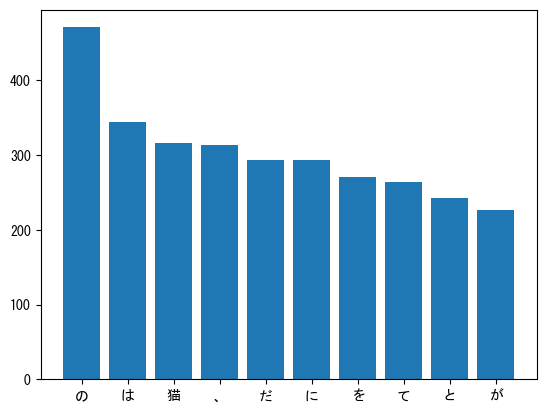

In [15]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'MS Gothic'
import matplotlib.pyplot as plt

left = [data[0] for data in top10_list]
height = [data[1] for data in top10_list]
plt.bar(x=left, height=height)
plt.show()  

**リーダブルコード**  
- P16 具体的な名前を使う
- P19 単語に情報を追加する
- P51 コードを段落に分割する
- P100 説明変数の導入